#### Prepare dataset

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

print('Dataset loading...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), 'training sequences')
print(len(x_test), 'testing sequences')

print('Sequences (batch x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)

Dataset loading...
25000 training sequences
25000 testing sequences
Sequences (batch x time)
Shape of x_train:  (25000, 500)
Shape of x_test:  (25000, 500)


### Build a model

In [12]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [13]:
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, 
                    y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 140ms/step - loss: 0.7861 - acc: 0.5028 - val_loss: 0.6871 - val_acc: 0.5440
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.6727 - acc: 0.6425 - val_loss: 0.6682 - val_acc: 0.6404
Epoch 3/10
157/157 [==============================] - 22s 140ms/step - loss: 0.6387 - acc: 0.7420 - val_loss: 0.6232 - val_acc: 0.7222
Epoch 4/10
157/157 [==============================] - 22s 139ms/step - loss: 0.5727 - acc: 0.8018 - val_loss: 0.5218 - val_acc: 0.7612
Epoch 5/10
157/157 [==============================] - 22s 141ms/step - loss: 0.4537 - acc: 0.8281 - val_loss: 0.4417 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 24s 150ms/step - loss: 0.3594 - acc: 0.8652 - val_loss: 0.4180 - val_acc: 0.8470
Epoch 7/10
157/157 [==============================] - 22s 139ms/step - loss: 0.3110 - acc: 0.8881 - val_loss: 0.4149 - val_acc: 0.8594
Epoch 8/10
157/157 [==============================] - 2

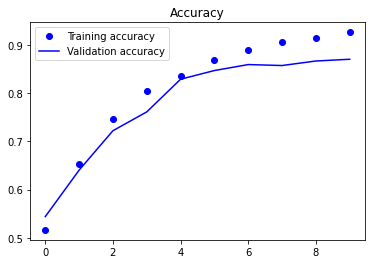

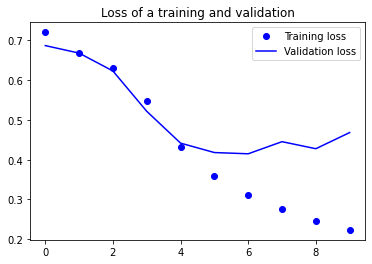

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of a training and validation')
plt.legend()

plt.show()